In [2]:
import pandas as pd 
import numpy as np

In [3]:
file_path = r"C:\projectx work with Jesus\New results (doxycycline time course)\DIANN results"


In [4]:
dfraw = pd.read_csv(f"{file_path}/20251211_DIANN-Revision_report.pg_matrix.tsv"
                    , sep="\t", index_col = 0)

In [5]:
df = dfraw.copy()

In [6]:
df["Genes"] = (
    df["Genes"]
    .astype(str)
    .str.split(";")   # 按 ; 分割
    .str[0]           # 只取第一个
    .str.strip()     # 去掉可能的空格
)

# 设为 index
df = df.set_index("Genes")


In [7]:
df = df[~df.index.duplicated(keep="first")]
df1 = df.iloc[:,4:]
df1.shape

(9473, 118)

In [8]:
column_names = [item.split("\\")[-1].split(".")[0] for item in df1.columns]

df1.columns = column_names

In [9]:
df2 = df1.loc[:, ~df1.columns.str.contains("blank", case=False, na=False)]
df2

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
Genes,,,,,,,,,,,,,,,,,,,,,
NUDT4B,537378.0,715529.000,891815.00,1109930.0,671624.0,1038120.0,366861.0,505967.0,407748.00,457274.00,...,429851.00,541818.00,514498.00,515546.0,538364.0,575636.0,607012.0,586532.0,628174.00,538023.00
PIGBOS1,31689.1,168546.000,42261.10,42246.3,NaN,NaN,159359.0,38719.9,NaN,164553.00,...,55695.30,57692.70,30121.80,NaN,30409.6,74205.8,40609.9,NaN,44623.60,66148.40
SMIM10L3,NaN,290.815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2179.72,...,NaN,1029.59,1692.33,NaN,NaN,NaN,NaN,NaN,1646.96,1851.61
TMEM275,67777.3,31910.600,99747.60,46045.0,53093.8,39986.9,117568.0,88769.4,130019.00,149649.00,...,27415.80,NaN,76116.90,NaN,69326.5,69009.2,58308.2,NaN,54567.20,57538.00
CENPVL1,17992.2,16976.200,7475.95,25831.0,17926.5,17589.5,55468.7,41741.8,54137.70,66724.90,...,7033.51,16311.40,9453.53,34999.3,45253.9,51757.7,25132.8,33391.4,29245.40,22509.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZHX2,13145.8,25823.800,2799.97,16767.3,42853.3,18981.7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6084.3,NaN,3134.75,NaN
MORC2,1892940.0,1454230.000,1821140.00,1642340.0,1817900.0,1676320.0,2011200.0,1748410.0,1898360.00,1649060.00,...,2555800.00,2534990.00,2513730.00,2623680.0,1894660.0,1848480.0,1765020.0,1963490.0,1903060.00,1972260.00
IVNS1ABP,526229.0,524431.000,568194.00,605885.0,799871.0,705138.0,551678.0,584367.0,425735.00,515127.00,...,295407.00,350116.00,427796.00,410643.0,463163.0,530948.0,467519.0,475551.0,522119.00,414017.00


In [11]:
df2.loc[:, df2.columns.str.contains("G3")]

,G3_20251207152106
Genes,
NUDT4B,451026.0
PIGBOS1,35181.9
SMIM10L3,NaN
TMEM275,NaN
CENPVL1,11070.9
...,...
ZHX2,NaN
MORC2,2830020.0
IVNS1ABP,322944.0


In [12]:
CL2_wells = [
    "A1","A2","A3","A4","A5","A6",
    "B1","B2","B3","B4","B5","B6",
    "C1","C2","C3","C4","C5","C6",
    "D1","D2","D3","D4","D5","D6",
    "E1","E2","E3","E4","E5","E6",
    "F1","F2","F3","F4","F5","F6",
    "G1","G2","G3_20251207152106","G4","G5","G6",
    "H1","H2","H3","H4","H5","H6",
]

CL2_samples = [
    "CL2_VEH_3d_1","CL2_VEH_3d_2","CL2_VEH_3d_3","CL2_VEH_3d_4","CL2_VEH_3d_5","CL2_VEH_3d_6",
    "CL2_VEH_4d_1","CL2_VEH_4d_2","CL2_VEH_4d_3","CL2_VEH_4d_4","CL2_VEH_4d_5","CL2_VEH_4d_6",
    "CL2_VEH_8d_1","CL2_VEH_8d_2","CL2_VEH_8d_3","CL2_VEH_8d_4","CL2_VEH_8d_5","CL2_VEH_8d_6",
    "CL2_VEH_16d_1","CL2_VEH_16d_2","CL2_VEH_16d_3","CL2_VEH_16d_4","CL2_VEH_16d_5","CL2_VEH_16d_6",

    "CL2_DAPT_3d_1","CL2_DAPT_3d_2","CL2_DAPT_3d_3","CL2_DAPT_3d_4","CL2_DAPT_3d_5","CL2_DAPT_3d_6",
    "CL2_DAPT_4d_1","CL2_DAPT_4d_2","CL2_DAPT_4d_3","CL2_DAPT_4d_4","CL2_DAPT_4d_5","CL2_DAPT_4d_6",
    "CL2_DAPT_8d_1","CL2_DAPT_8d_2","CL2_DAPT_8d_3","CL2_DAPT_8d_4","CL2_DAPT_8d_5","CL2_DAPT_8d_6",
    "CL2_DAPT_16d_1","CL2_DAPT_16d_2","CL2_DAPT_16d_3","CL2_DAPT_16d_4","CL2_DAPT_16d_5","CL2_DAPT_16d_6",
]

CL5_wells = [
    "A7","A8","A9","A10","A11","A12",
    "B7","B8","B9","B10","B11","B12",
    "C7","C8","C9","C10","C11","C12",
    "D7","D8","D9","D10","D11","D12",
    "E7","E8","E9","E10","E11","E12",
    "F7","F8","F9","F10","F11","F12",
    "G7","G8","G9","G10","G11","G12",
    "H7","H8","H9","H10","H11","H12",
]

CL5_samples = [
    "CL5_VEH_3d_1","CL5_VEH_3d_2","CL5_VEH_3d_3","CL5_VEH_3d_4","CL5_VEH_3d_5","CL5_VEH_3d_6",
    "CL5_VEH_4d_1","CL5_VEH_4d_2","CL5_VEH_4d_3","CL5_VEH_4d_4","CL5_VEH_4d_5","CL5_VEH_4d_6",
    "CL5_VEH_8d_1","CL5_VEH_8d_2","CL5_VEH_8d_3","CL5_VEH_8d_4","CL5_VEH_8d_5","CL5_VEH_8d_6",
    "CL5_VEH_16d_1","CL5_VEH_16d_2","CL5_VEH_16d_3","CL5_VEH_16d_4","CL5_VEH_16d_5","CL5_VEH_16d_6",

    "CL5_DAPT_3d_1","CL5_DAPT_3d_2","CL5_DAPT_3d_3","CL5_DAPT_3d_4","CL5_DAPT_3d_5","CL5_DAPT_3d_6",
    "CL5_DAPT_4d_1","CL5_DAPT_4d_2","CL5_DAPT_4d_3","CL5_DAPT_4d_4","CL5_DAPT_4d_5","CL5_DAPT_4d_6",
    "CL5_DAPT_8d_1","CL5_DAPT_8d_2","CL5_DAPT_8d_3","CL5_DAPT_8d_4","CL5_DAPT_8d_5","CL5_DAPT_8d_6",
    "CL5_DAPT_16d_1","CL5_DAPT_16d_2","CL5_DAPT_16d_3","CL5_DAPT_16d_4","CL5_DAPT_16d_5","CL5_DAPT_16d_6",
]

CL5_map = dict(zip(CL5_wells, CL5_samples))
CL2_map = dict(zip(CL2_wells, CL2_samples))
well_to_sample = {**CL2_map, **CL5_map}

In [13]:
df3= df2.rename(columns=well_to_sample).drop("CL5_VEH_8d_3",axis = 1)

In [14]:

import re


pat = re.compile(r"^(?P<geno>[^_]+)_(?P<trt>[^_]+)_(?P<time>[^_]+)_(?P<rep>\d+)$")

sample_info = []
for c in df3.columns:
    m = pat.match(str(c))
    if m:
        group = f"{m.group('geno')}_{m.group('trt')}"
        sample_info.append((c, group))

sample_df = pd.DataFrame(sample_info, columns=["Sample","Group"])

detected = df3.notna().sum(axis=0)

detected_df = (
    detected.rename("n_proteins")
            .reset_index()
            .rename(columns={"index":"Sample"})
            .merge(sample_df, on="Sample")
)


C:\Users\jiangy5\AppData\Local\Temp\ipykernel_15232\2952979659.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_15232\2952979659.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\jiangy5\AppData\Local\Temp\ipykernel_15232\2952979659.py:16: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  ax = sns.barplot(


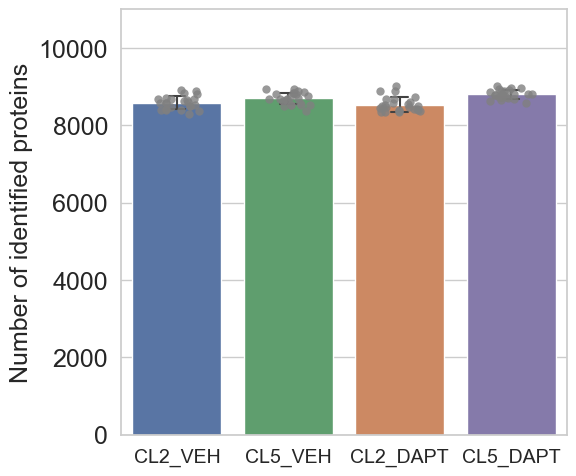

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"

palette = {
    "CL2_VEH": "#4C72B0",   # blue
    "CL2_DAPT": "#DD8452",  # red
    "CL5_VEH": "#55A868",   # green
    "CL5_DAPT": "#8172B2"   # purple
}

sns.set_theme(style="whitegrid", font="Arial", font_scale=1.2)

plt.figure(figsize=(6,5))

ax = sns.barplot(
    data=detected_df,
    x="Group",
    y="n_proteins",
    ci="sd",
    capsize=0.15,
    errwidth=1.5,
    palette=palette
)

sns.stripplot(
    data=detected_df,
    x="Group",
    y="n_proteins",
    color="gray",
    size=6,
    jitter=0.2,
    alpha=0.8
)

ax.set_ylabel("Number of identified proteins", fontsize=18)
# ax.set_xlabel("Number of identified proteins", fontsize=14)
ax.set_ylim([0,11000])
ax.set_xlabel("")
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=18)
# ax.set_title("Protein identifications per group", fontsize=18)

plt.tight_layout()
plt.savefig(r"C:\projectx work with Jesus\New results (doxycycline time course)\figures\data_quality.svg", dpi=600, bbox_inches="tight")
plt.show()


In [18]:
# filter missing values half of samples

n_cols = df3.shape[1]
na_frac = df3.isna().sum(axis=1) / n_cols
df4 = df3.loc[na_frac <= 0.5]
df4.to_csv(f'{file_path}/filter_renamed_raw_matrix.csv')

In [19]:
from scipy.stats import zscore

df_log = np.log2(df4 + 1) 

df_z = pd.DataFrame(
    zscore(df_log, axis=0, nan_policy="omit"),
    index=df_log.index,
    columns=df_log.columns
)

In [20]:
df_tic = df4.div(df4.sum(), axis=1) * 100000000000

# log transform 
df_log2 = np.log2(df_tic + 1)

# protein-wise Z-score 
df_z2 = df_log2.sub(df_log2.mean(axis=1), axis=0) \
             .div(df_log2.std(axis=1), axis=0)

df_z2

,CL2_VEH_3d_1,CL2_VEH_3d_2,CL2_VEH_3d_3,CL2_VEH_3d_4,CL2_VEH_3d_5,CL2_VEH_3d_6,CL5_VEH_3d_1,CL5_VEH_3d_2,CL5_VEH_3d_3,CL5_VEH_3d_4,...,CL2_DAPT_16d_3,CL2_DAPT_16d_4,CL2_DAPT_16d_5,CL2_DAPT_16d_6,CL5_DAPT_16d_1,CL5_DAPT_16d_2,CL5_DAPT_16d_3,CL5_DAPT_16d_4,CL5_DAPT_16d_5,CL5_DAPT_16d_6
Genes,,,,,,,,,,,,,,,,,,,,,
NUDT4B,0.181312,1.700914,2.027487,3.609019,1.191007,3.149030,-2.201252,-1.015221,-1.650686,-1.301119,...,-0.977552,0.125677,-0.021298,0.001716,0.077272,0.399642,0.771650,0.577262,1.014655,0.371867
PIGBOS1,-0.729760,2.798784,-0.359768,-0.108378,NaN,NaN,2.325385,-0.724618,NaN,2.337642,...,0.376964,0.462938,-0.834665,NaN,-0.864683,0.978534,-0.207423,NaN,0.024148,0.868605
TMEM275,0.218073,-1.049902,0.713496,-0.445550,-0.226117,-0.754455,0.963653,0.346206,1.166311,1.346918,...,-1.441854,NaN,0.424437,NaN,0.215086,0.211547,-0.040197,NaN,-0.125983,-0.002594
CENPVL1,-0.113164,-0.143966,-1.939401,0.582345,-0.129537,-0.188891,1.726258,1.078416,1.705549,2.019928,...,-1.901324,-0.332166,-1.304840,1.123665,1.549355,1.802759,0.515753,1.027635,0.829903,0.375335
NBDY,2.226307,1.555291,1.375993,1.149092,1.413782,1.149607,1.393824,0.863606,1.021058,1.165076,...,-0.061230,1.074436,-0.280856,0.997819,0.478878,1.136760,-0.210867,0.048911,-0.143214,1.096537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MYO16,-0.876523,-0.780849,-2.094663,-1.033789,-0.187112,-2.745779,-0.769396,-2.695494,-0.985503,-1.938672,...,0.576355,-0.071305,0.808898,-0.419848,0.388245,1.126334,-0.583815,-0.637114,0.532991,1.045619
MORC2,-0.477606,-1.730201,-1.306232,-1.198927,-0.734902,-1.265816,-0.881548,-2.041091,-1.133230,-2.148137,...,1.064448,1.054979,1.120444,1.378328,-0.609358,-0.733818,-0.841085,-0.283201,-0.314190,-0.021173
IVNS1ABP,1.268403,1.420190,1.142490,1.886593,2.917421,2.362566,0.929377,0.897181,-0.051777,0.551844,...,-1.140591,-0.437138,0.441808,0.290306,0.662538,1.217567,0.818607,0.856180,1.331454,0.471174


In [21]:

from itertools import combinations
from scipy.stats import ttest_ind

# ---- Set global font once ----
plt.rcParams["font.family"] = "Arial"


In [22]:

import seaborn as sns


In [23]:

def plot_gene_timecourse_quantile(
    df, gene, genotype="HOM", treatment="VEH",
    times=("3d","4d","8d","16d")
):
    cond_cols = [c for c in df.columns if c.startswith(f"{genotype}_{treatment}_")]
    sub = df.loc[gene, cond_cols]

    rows = []
    for t in times:
        cols_t = [c for c in cond_cols if f"_{t}_" in c]
        for c in cols_t:
            rows.append({"Time": t, "Value": float(sub[c])})

    plot_df = pd.DataFrame(rows)

    sns.set_theme(font="Arial", font_scale=1.4)
    plt.figure(figsize=(7,6))

    # Quantile boxes (25–75%)
    sns.boxplot(
        data=plot_df,
        x="Time",
        y="Value",
        width=0.5,
        showfliers=False,     # 不画极端点
        linewidth=2
    )

    # Show individual replicates
    sns.stripplot(
        data=plot_df,
        x="Time",
        y="Value",
        size=7,
        jitter=0.15,
        alpha=0.7
    )

    # Robust Y-axis scaling
    y = plot_df["Value"].values
    ymin, ymax = np.percentile(y, [5, 95])
    pad = 0.15 * (ymax - ymin)
    plt.ylim(ymin - pad, ymax + pad)

    plt.ylabel("Intensity", fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.title(f"{gene} | {genotype} {treatment}", fontsize=18)

    plt.tight_layout()
    plt.show()


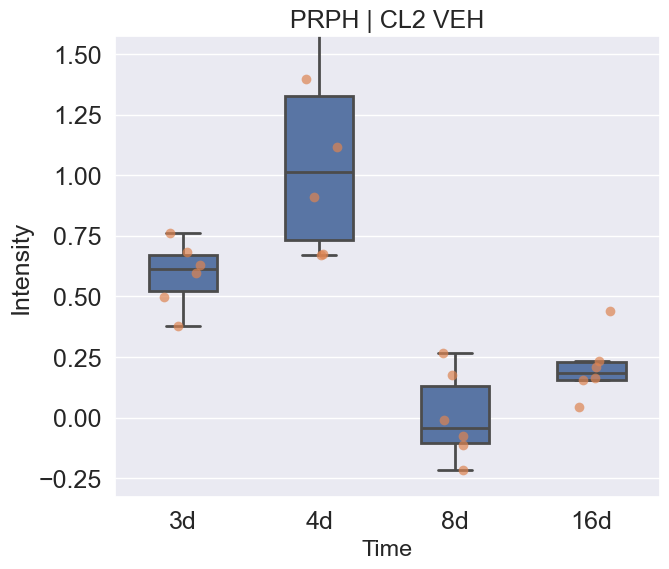

In [24]:
plot_gene_timecourse_quantile(
    df_z2, gene = "PRPH",  
    genotype="CL2", treatment="VEH",
    times=("3d","4d","8d","16d")
)

In [25]:
import os

def plot_gene_group_4times_overlay(
    df,
    gene,
    genotypes=("CL2", "CL5"),
    treatments=("VEH", "DAPT"),
    times=("3d","4d","8d","16d"),
    figsize=(8,6),
    ylabel="Intensity",
    robust_ylim=True,
    y_percentiles=(5, 99),
):
 

    # ---------- build long-form ----------
    rows = []
    for g in genotypes:
        for tr in treatments:
            cond_cols = [c for c in df.columns if c.startswith(f"{g}_{tr}_")]
            if len(cond_cols) == 0:
                continue
            sub = df.loc[gene, cond_cols]

            for t in times:
                cols_t = [c for c in cond_cols if f"_{t}_" in c]
                for c in cols_t:
                    v = sub.get(c)
                    if pd.notna(v):
                        rows.append({
                            "Group": f"{g}_{tr}",
                            "Genotype": g,
                            "Treatment": tr,
                            "Time": t,
                            "Value": float(v)
                        })

    plot_df = pd.DataFrame(rows)
    if plot_df.empty:
        raise ValueError(f"No data found for gene={gene}")

    plot_df["Time"] = pd.Categorical(plot_df["Time"], categories=list(times), ordered=True)
    plot_df["Group"] = pd.Categorical(
        plot_df["Group"],
        categories=[f"{g}_{t}" for g in genotypes for t in treatments],
        ordered=True
    )

    # ---------- plotting ----------
    sns.set_theme(style="whitegrid", font="Arial", font_scale=1.2)
    plt.figure(figsize=figsize)

    # boxplot: X = Group, hue = Time
    sns.boxplot(
        data=plot_df,
        x="Group",
        y="Value",
        hue="Time",
        showfliers=False,
        width=0.6,
        linewidth=1.5
    )

    # dots
    sns.stripplot(
        data=plot_df,
        x="Group",
        y="Value",
        hue="Time",
        dodge=True,
        jitter=0.15,
        alpha=0.6,
        size=5,
        linewidth=0
    )

    # fix duplicated legend
    handles, labels = plt.gca().get_legend_handles_labels()
    n_times = len(times)
    plt.legend(handles[:n_times], labels[:n_times], title="Time",
               fontsize=14, title_fontsize=14)

    # Axis formatting
    plt.xlabel("Group", fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=20)
    plt.title(f"{gene}", fontsize=20)

    # Robust y-axis
    if robust_ylim:
        y = plot_df["Value"].values
        lo, hi = np.percentile(y, list(y_percentiles))
        pad = 0.2 * (hi - lo) if hi > lo else 1.0
        plt.ylim(lo - pad, hi + pad)

    plt.tight_layout
    
    save_file = os.path.join(out_path, f"{gene}.svg")
    plt.savefig(save_file, dpi=600, bbox_inches="tight")
    plt.show()

    return plot_df


In [96]:
# df_z2.to_csv(f'{file_path}/filter_renamed_normalized_matrix.csv')
# df_z2.head().to_csv(f'{file_path}/test.csv')

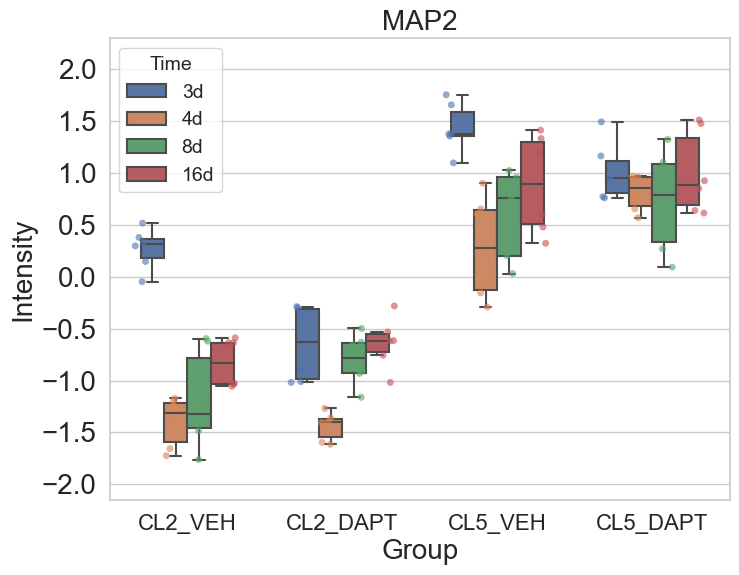

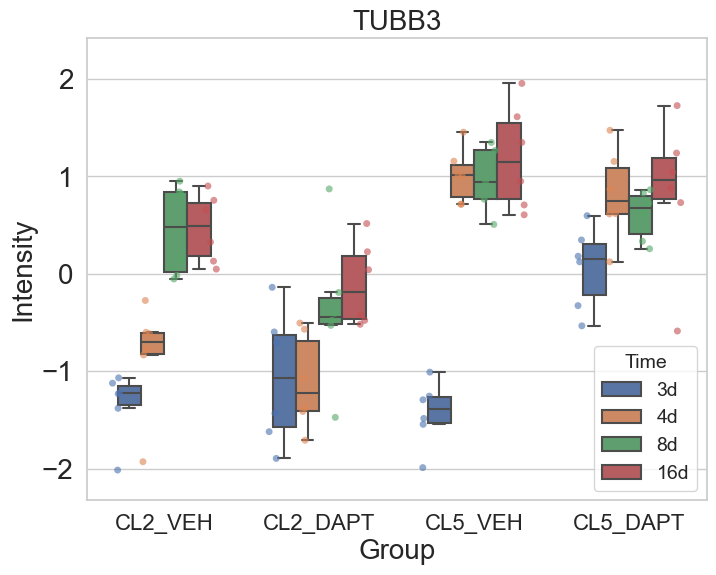

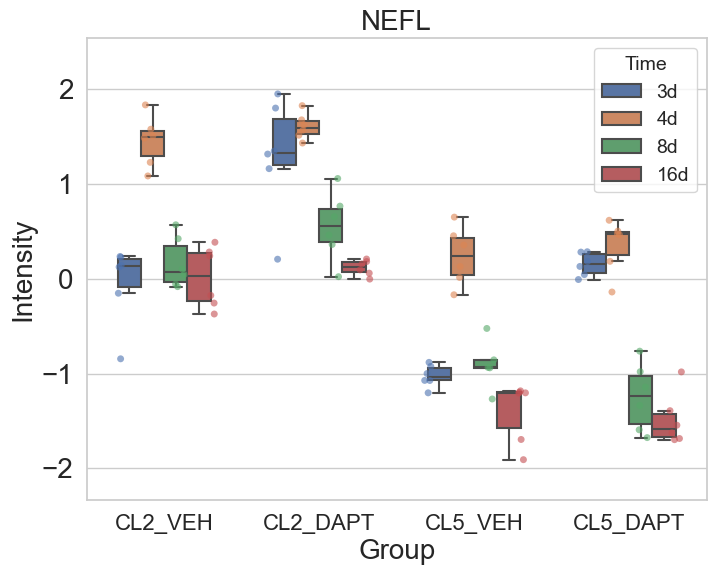

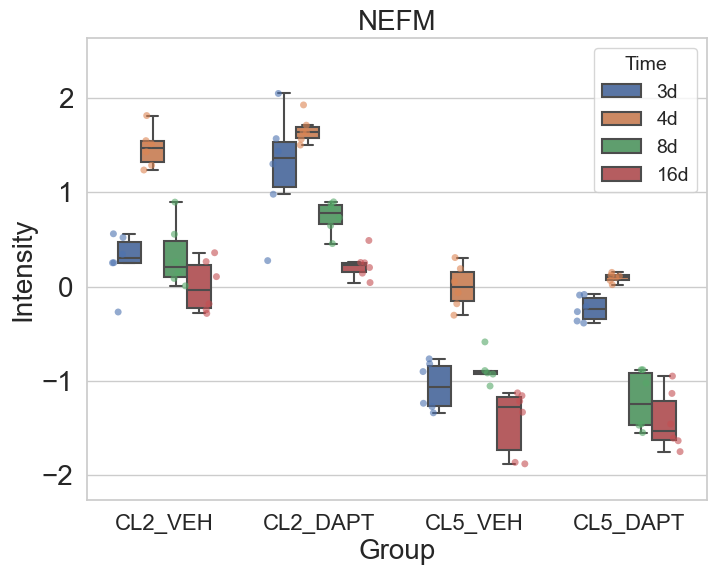

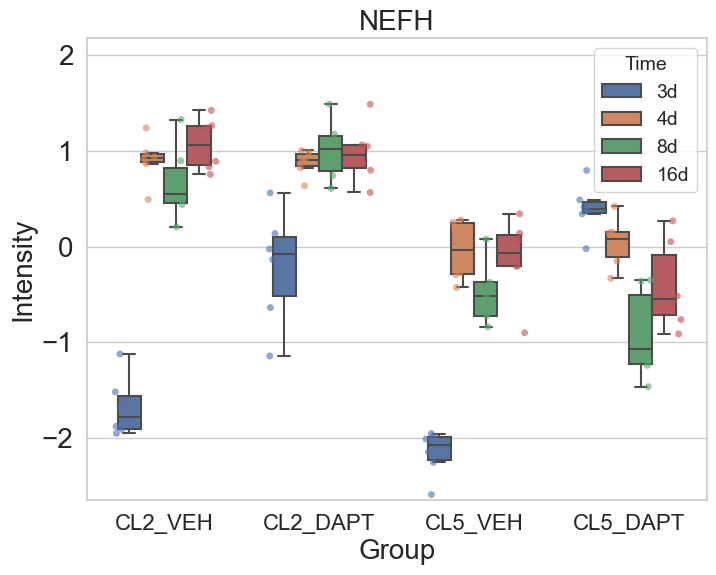

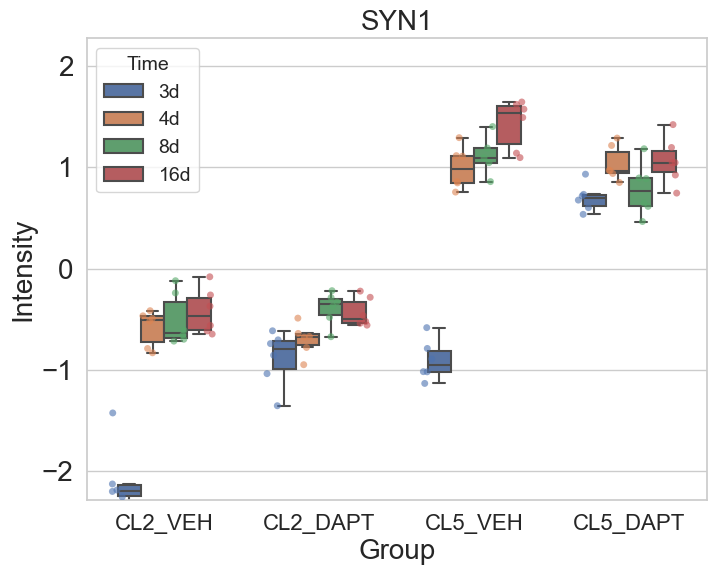

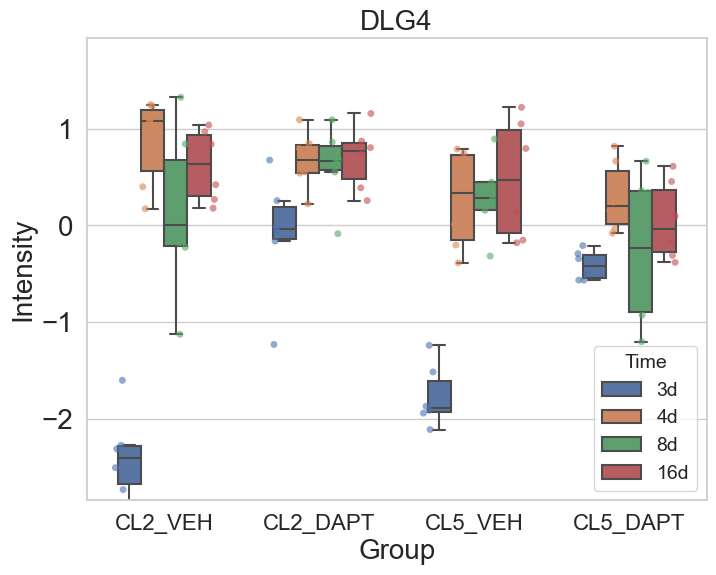

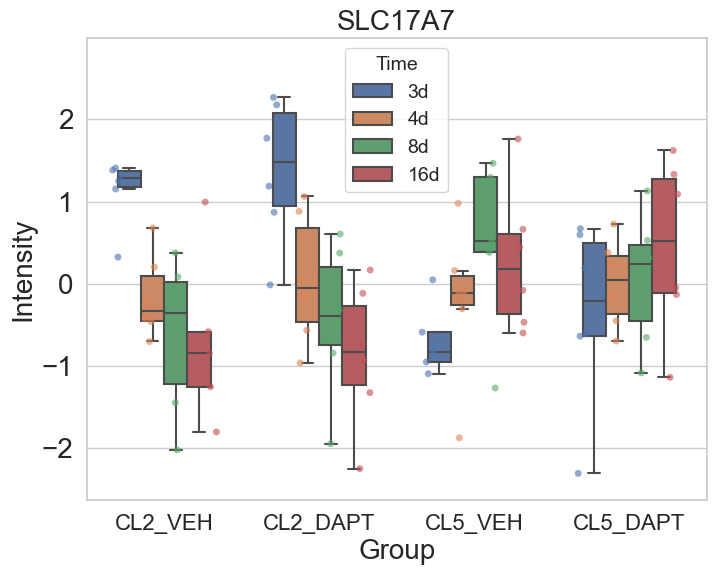

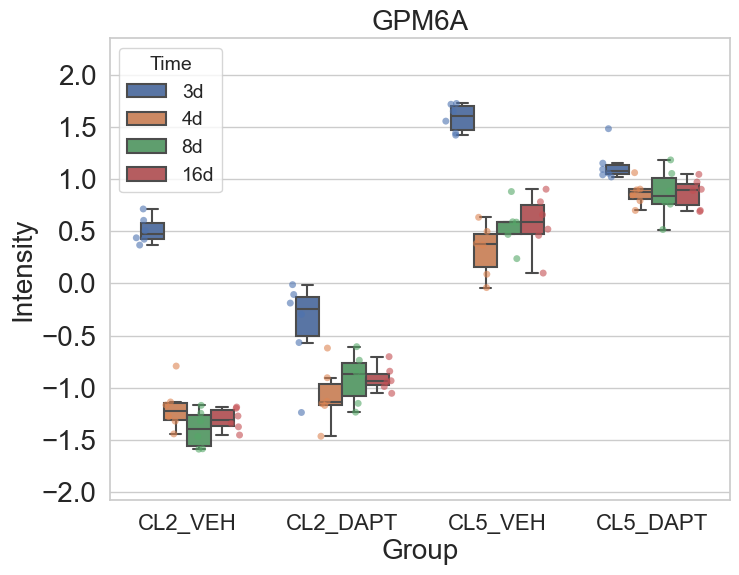

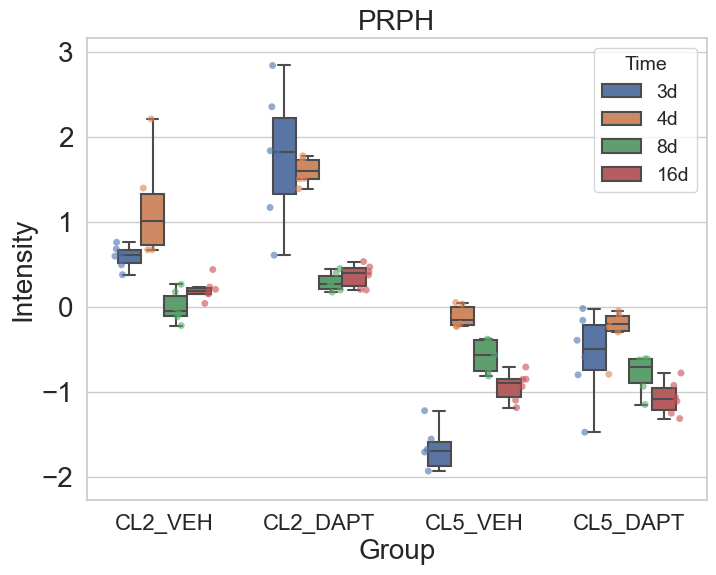

In [26]:


gene_list = ["MAP2", "TUBB3", "NEFL","NEFM","NEFH", "SYN1", "DLG4" , "SLC17A7" , "GPM6A","PRPH"]

out_path = r"C:\projectx work with Jesus\New results (doxycycline time course)\figures"

for name in gene_list: 
    plot_gene_group_4times_overlay(df_z2, gene = name)

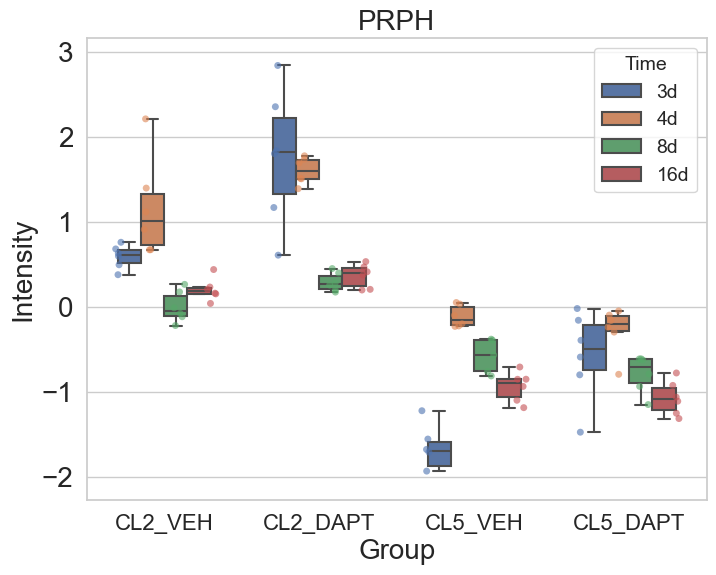

,Group,Genotype,Treatment,Time,Value
0,CL2_VEH,CL2,VEH,3d,0.598105
1,CL2_VEH,CL2,VEH,3d,0.631191
2,CL2_VEH,CL2,VEH,3d,0.496430
3,CL2_VEH,CL2,VEH,3d,0.760792
4,CL2_VEH,CL2,VEH,3d,0.379758
...,...,...,...,...,...
90,CL5_DAPT,CL5,DAPT,16d,-1.248688
91,CL5_DAPT,CL5,DAPT,16d,-0.775324
92,CL5_DAPT,CL5,DAPT,16d,-0.921493
93,CL5_DAPT,CL5,DAPT,16d,-1.107159


In [28]:
plot_gene_group_4times_overlay(df_z2, gene = "PRPH")

In [89]:
# plot_gene_group_4times_overlay(df_z2, gene = "PRPH")

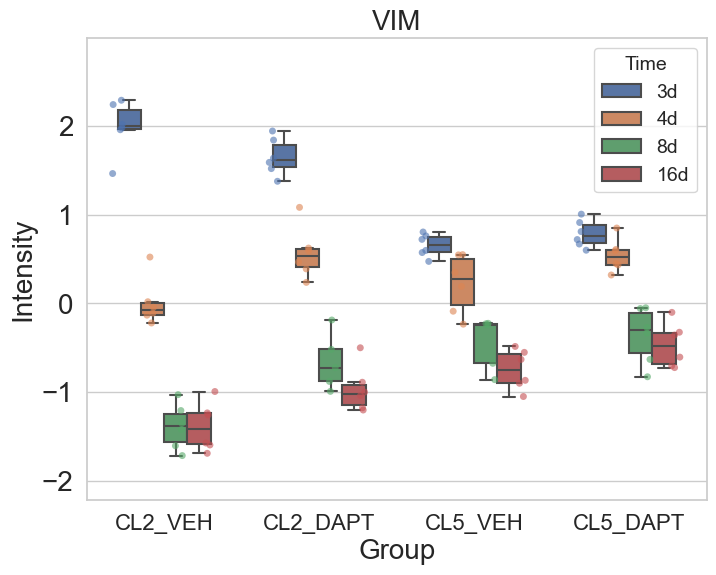

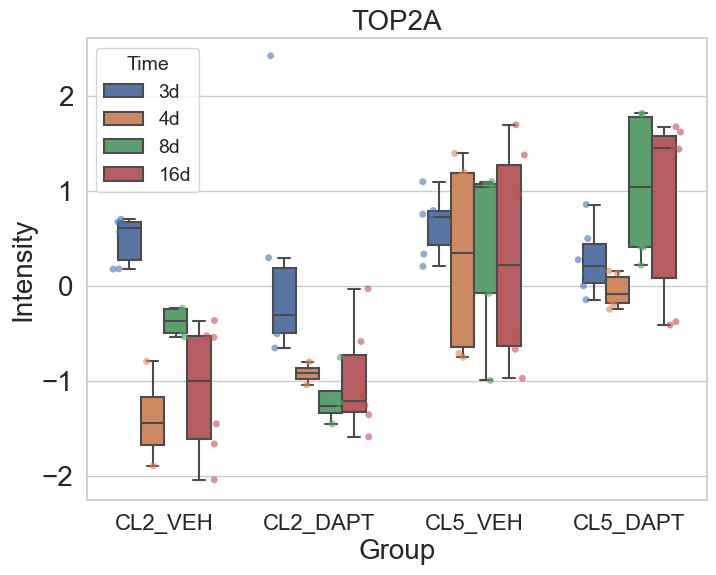

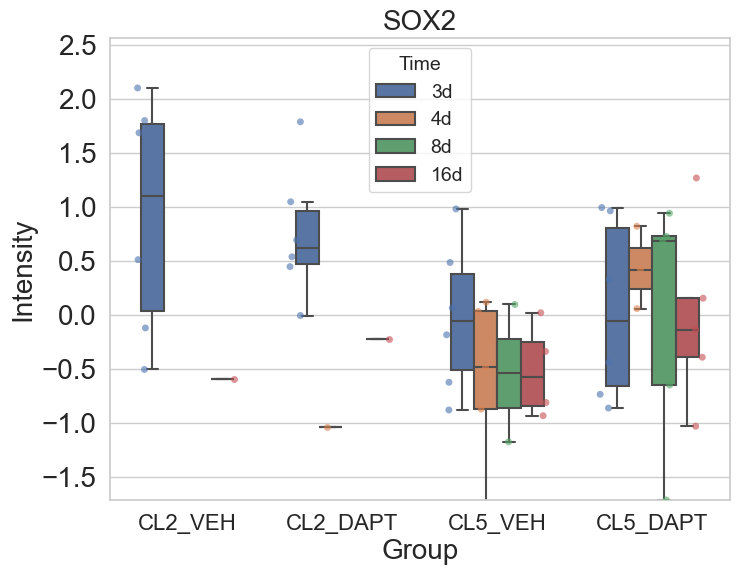

KeyError: 'GFAP'

In [90]:
gene_list2 = ["VIM", "TOP2A", "SOX2", "GFAP"] 

out_path = r"C:\projectx work with Jesus\New results (doxycycline time course)\figures"

for name in gene_list2: 
    plot_gene_group_4times_overlay(df_z2, gene = name)



In [91]:
import re
import numpy as np
import pandas as pd

def gene_time_trend_single(
    df,
    gene,
    times=("3d","4d","8d","16d"),
    genotypes=("HOM","HET"),
    treatments=("VEH","DAPT"),
    agg="mean",           # mean or median across replicates
    method="slope",      # slope | delta | spearman
    eps=0.0              # threshold for calling up/down
):
    """
    For one gene, return:
      1) mean time-course per group
      2) trend per group (Up / Down / Flat)
    """
    # ---- 防止 tuple 嵌套
    def _flatten(x):
        if isinstance(x, (list, tuple)) and len(x) == 1 and isinstance(x[0], (list, tuple)):
            return tuple(x[0])
        return tuple(x)

    times = _flatten(times)
    genotypes = _flatten(genotypes)
    treatments = _flatten(treatments)
    
    pat = re.compile(r"^(?P<geno>[^_]+)_(?P<trt>[^_]+)_(?P<time>[^_]+)_(?P<rep>\d+)$")

    rows = []
    for c in df.columns:
        m = pat.match(c)
        if not m:
            continue
        geno, trt, t, rep = m.group("geno"), m.group("trt"), m.group("time"), int(m.group("rep"))
        if geno in genotypes and trt in treatments and t in times:
            v = df.loc[gene, c]
            if pd.notna(v):
                rows.append((geno, trt, f"{geno}_{trt}", t, rep, float(v)))

    if len(rows) == 0:
        raise ValueError(f"No data found for gene {gene}")

    long = pd.DataFrame(rows, columns=["Genotype","Treatment","Group","Time","Rep","Value"])
    long["Time"] = pd.Categorical(long["Time"], categories=list(times), ordered=True)

    # ---- aggregate replicates at each timepoint
    if agg == "median":
        mean_df = long.groupby(["Group","Genotype","Treatment","Time"], observed=True)["Value"].median().reset_index()
    else:
        mean_df = long.groupby(["Group","Genotype","Treatment","Time"], observed=True)["Value"].mean().reset_index()

    # numeric time
    tmap = {t:i for i,t in enumerate(times)}
    mean_df["t"] = mean_df["Time"].map(tmap).astype(float)

    # ---- compute trends
    out = []
    for g, sub in mean_df.groupby("Group"):
        sub = sub.sort_values("t")
        if sub.shape[0] < 3:
            out.append((g, "Insufficient", np.nan))
            continue

        y = sub["Value"].values
        x = sub["t"].values

        if method == "delta":
            metric = y[-1] - y[0]
        elif method == "spearman":
            rx = pd.Series(x).rank().values
            ry = pd.Series(y).rank().values
            metric = np.corrcoef(rx, ry)[0,1]
        else:   # slope
            A = np.vstack([x, np.ones_like(x)]).T
            slope, _ = np.linalg.lstsq(A, y, rcond=None)[0]
            metric = slope

        if metric > eps:
            trend = "Up"
        elif metric < -eps:
            trend = "Down"
        else:
            trend = "Flat"

        out.append((g, trend, metric))

    trend_df = pd.DataFrame(out, columns=["Group","Trend","Metric"])

    return mean_df, trend_df


In [27]:
mean_df, trend_df = gene_time_trend_single(
    df_z2,
    gene="VIM",
    times=("3d","4d","8d","16d"),
    genotypes=("HOM","HET"),
    treatments=("VEH","DAPT"),
    agg="mean",        
    method="slope",      
    eps=0.0             
)

mean_df
trend_df

,Group,Trend,Metric
0,HET_DAPT,Down,-0.469264
1,HET_VEH,Down,-0.481383
2,HOM_DAPT,Down,-0.912750
3,HOM_VEH,Down,-1.159806
